# Two-Level, Four Factor Factorial Design

Suppose we're given the results of a $2^4$ factorial design, which yields the following contrasts:

$$
A \leftarrow 0.4 \\
B \leftarrow -7.6 \\
C \leftarrow 14.1 \\
D \leftarrow 66.7 \\
AB \leftarrow 16.7 \\
AC \leftarrow 3.1\\
AD \leftarrow 5.2 \\
BC \leftarrow 8.3 \\
BD \leftarrow -3.6 \\
CD \leftarrow 14.3 \\
ABC \leftarrow -0.1 \\
ABD \leftarrow -4.7 \\
ACD \leftarrow 7.7 \\
BCD \leftarrow -2.3 \\
ABCD \leftarrow 3.9 \\
$$

(This follows question 4.3 in Box and Draper.) 

We'll use quantile plots to interpret the results - we can't go much deeper than that, since the problem does not give the vaues of input or response variables.

We'll start by importing some libraries, then populate  a dictionary with the various main and interation effects (the only assumption is that the response has a mean of 0, `x0 = 0.0`).


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from numpy.random import rand, seed
import seaborn as sns
import scipy.stats as stats
from matplotlib.pyplot import *

In [2]:
effects = {}
effects[0] = {'x0': 0.0}
effects[1] = {'x1': 0.4,
              'x2': -7.6,
              'x3': 14.1,
              'x4': 66.7}

effects[2] = {'x1-x2': 16.7,
              'x1-x3': 3.1,
              'x1-x4': 5.2,
              'x2-x3': 8.3,
              'x3-x4': 14.3}
effects[3] = {'x1-x2-x3': -0.1,
              'x1-x2-x4': -4.7,
              'x1-x3-x4': 7.7,
              'x2-x3-x4': -2.3}

effects[4] = {'x1-x2-x3-x4': 3.9}


Now we can use that dictionary to create a dataframe (this is a bit more work than it needs to be, but this is showing you how might structure the data for more complicated interactions). The important thing is that we have a labeled list that's a Pandas DataFrame:

In [3]:
master_dict = {}
for nvars in effects.keys():

    effect = effects[nvars]
    for k in effect.keys():
        v = effect[k]
        master_dict[k] = v

master_df = pd.DataFrame(master_dict,index=['dy']).T
master_df

,dy
x0,0.0
x1,0.4
x1-x2,16.7
x1-x2-x3,-0.1
x1-x2-x3-x4,3.9
x1-x2-x4,-4.7
x1-x3,3.1
x1-x3-x4,7.7
x1-x4,5.2
x2,-7.6


In [4]:
#print help(master_df.sort)
view = master_df.sort_values(by='dy',ascending=False)
view

,dy
x4,66.7
x1-x2,16.7
x3-x4,14.3
x3,14.1
x2-x3,8.3
x1-x3-x4,7.7
x1-x4,5.2
x1-x2-x3-x4,3.9
x1-x3,3.1
x1,0.4


This table shows that one variable, $x_4$, has a huge effect that outshadows all other effects. In case it wasn't obvious already, the quantile-quantile plot makes it crystal clear:

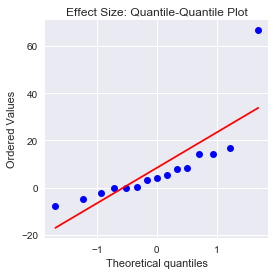

In [5]:
# Quantile-quantile plot of effects:

fig = figure(figsize=(4,4))
ax1 = fig.add_subplot(111)

stats.probplot(master_df['dy'], dist="norm", plot=ax1)
ax1.set_title('Effect Size: Quantile-Quantile Plot')
show()

The largest ordered value in the effects, which is the effect of $x_4$, is way off by itself. In this region of operational state-space, $x_4$ dominates the system's behavior. 